# Übung 8 PCA - Rainier Robles & Valentin Wolf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_table('zip.train', delim_whitespace=True,header=None)
test = pd.read_table('zip.test', delim_whitespace=True,header=None)
data = np.concatenate((train,test))
#split labels y from data X
y = pd.DataFrame(data)[0].as_matrix()
X = pd.DataFrame(data).drop(0, axis=1).as_matrix()


In [60]:
from scipy.linalg import eigh

class PCA():
    def fit(self,X,dims=10):
        
        #Standardization -- weird results
        #N,features = X.shape
        #for i in range(features-1):
        #    X[i] = (X[i] - X[i].mean()) / np.sqrt(X[i].var())
        
        
        covariance = np.cov(X.T,bias=True)
        print("cov finished")
        eigenvalues, eigenvectors = eigh(covariance) #np.linalg.eig(covariance) way slower
        print("eig finished")
        indices = eigenvalues.argpartition(-dims)[-dims:][::-1]
        #indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, indices]
        print("found biggest eig")
        self.components = eigenvectors#[:, :dims]
        print("selected vecs")
        #self.big_w_normalized =  (w[highest] - w[highest].mean()) / np.sqrt(w[highest].var())
        #return self.big_v#, self.big_w_normalized

    def transform(self,X):
        return X.dot(self.components)

In [61]:
zip_PCA = PCA()
v= zip_PCA.fit(X,dims=2)
reduced = zip_PCA.transform(X)

cov finished
eig finished
found biggest eig
selected vecs


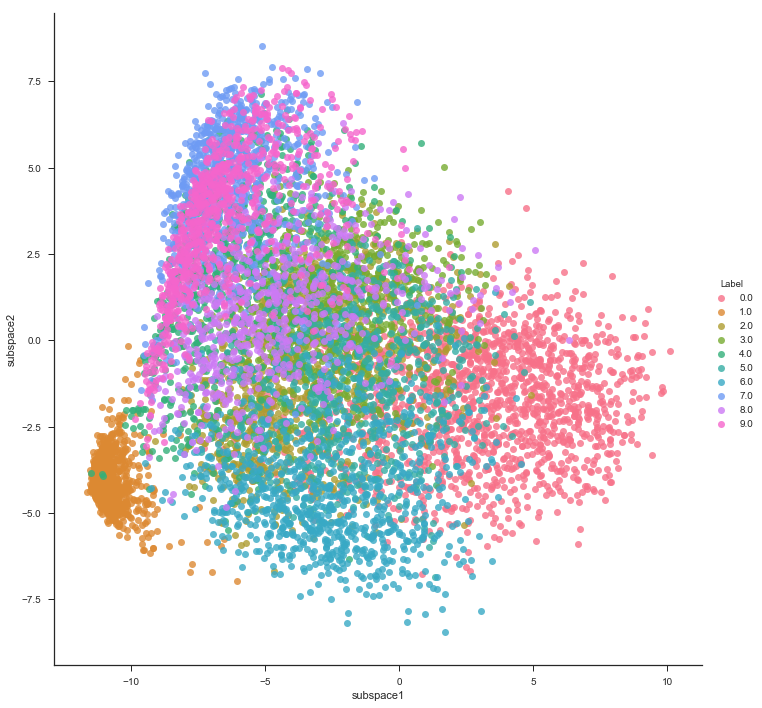

In [62]:
subspaces_df = pd.DataFrame(reduced,columns=["subspace1","subspace2"])
y_df = pd.DataFrame(y,columns=["Label"])
df = subspaces_df.join(y_df)
sns.set(style="ticks", color_codes=True)

sns.lmplot(x="subspace1",y="subspace2", data=df, hue='Label', fit_reg=False,size=10)

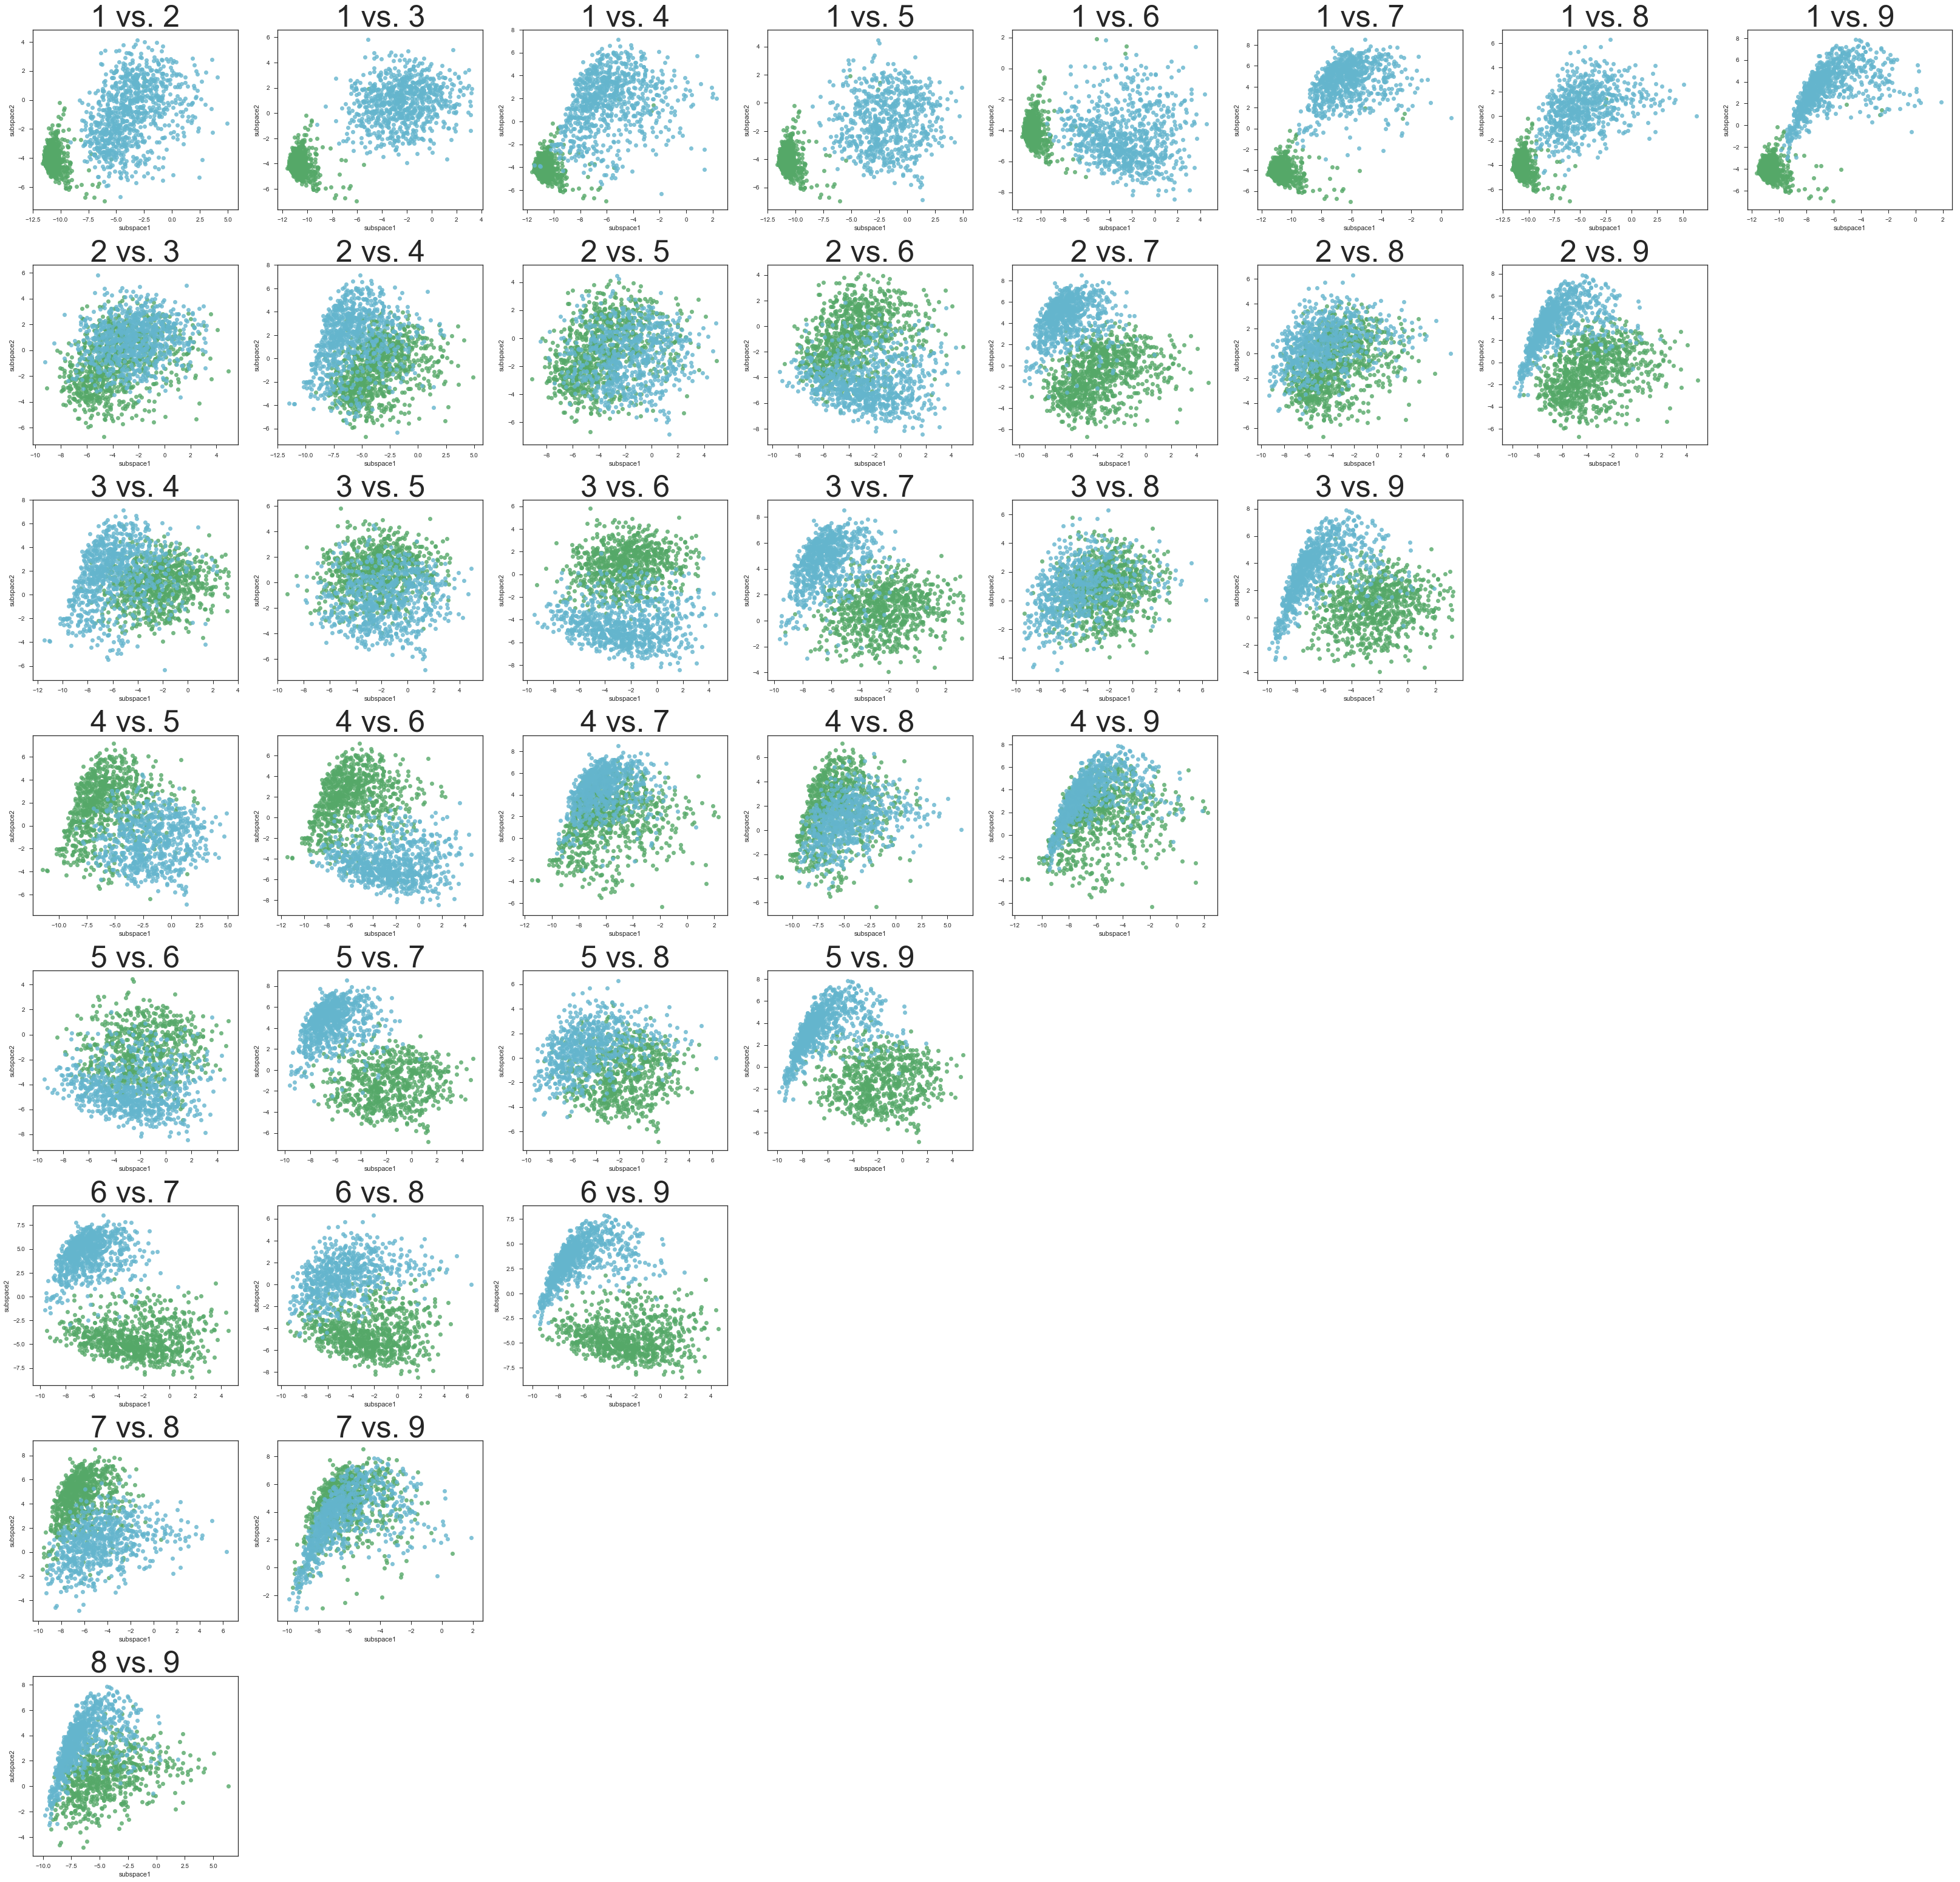

In [43]:
#nplots = 10
#for i in range(nplots-1):
#    fig, axes = plt.subplots(ncols=nplots-1, sharey=True ,figsize=(6*(nplots-1), 5))
#
#    for j in range(i+1,nplots):
#        
#        bin_dat1 = df[(y_train==i)]
#        bin_dat2 = df[(y_train==j)]
#        #sns.pairplot(bin_dat, hue="y", size=5, vars=[0,1])
#        try:
#            curr_axis = axes[j-1-i]
#        except TypeError:
#            curr_axis = axes
#            
#        sns.regplot(ax=curr_axis,x="subspace1",y="subspace2", data=bin_dat1, fit_reg=False,scatter=True,color='g')
#        sns.regplot(ax=curr_axis,x="subspace1",y="subspace2", data=bin_dat2, fit_reg=False,scatter=True,color='c')
#        curr_axis.set_title(str(i) + " vs. " + str(j),fontsize= 50)
nplots = 10
plt.subplots(squeeze=False, figsize=(5*(nplots-1), 6*(nplots-2)))
for i in range(nplots-1):

    for j in range(i+1,nplots):
        bin_dat1 = df[(y==i)]
        bin_dat2 = df[(y==j)]
        
        try:
            curr_axis = plt.subplot2grid((nplots-1, nplots-2), (i, j-1-i))
        except TypeError:
            curr_axis = axes
            
        sns.regplot(ax=curr_axis,x="subspace1",y="subspace2", data=bin_dat1, fit_reg=False,scatter=True,color='g')
        sns.regplot(ax=curr_axis,x="subspace1",y="subspace2", data=bin_dat2, fit_reg=False,scatter=True,color='c')
        curr_axis.set_title(str(i) + " vs. " + str(j),fontsize= 50)
        
plt.tight_layout()

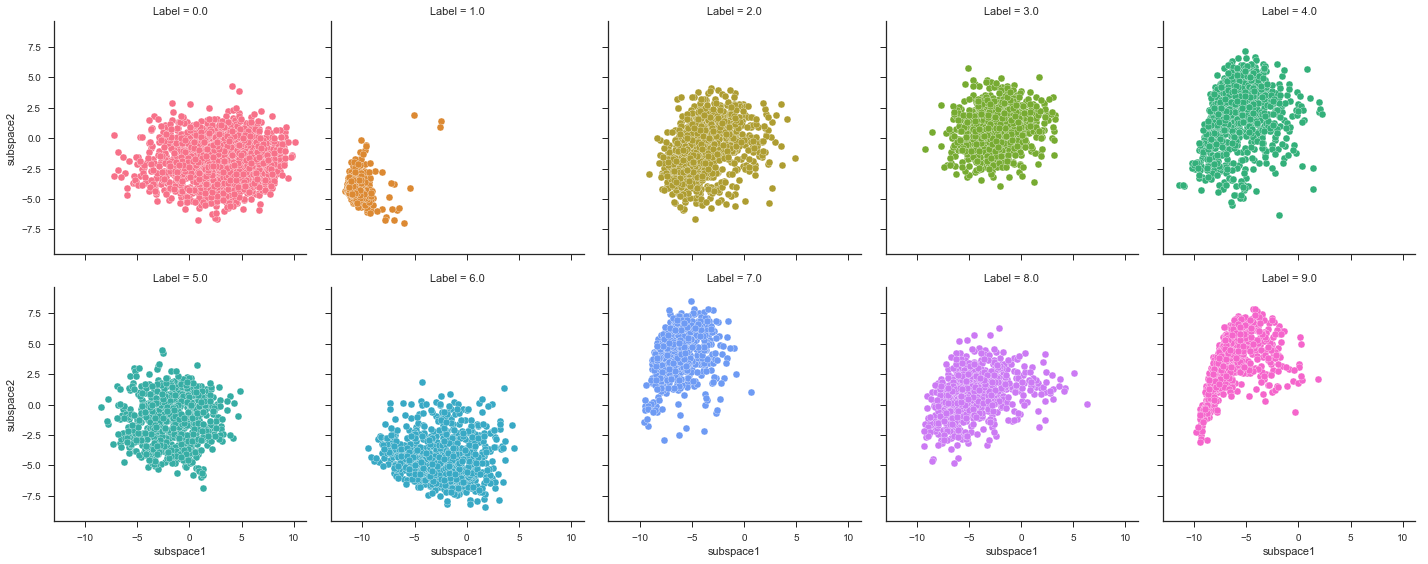

In [44]:
g = sns.FacetGrid(data=df, col="Label", hue="Label",size=4,col_wrap=5)
g = g.map(plt.scatter, "subspace1", "subspace2",edgecolor="w")

# Aufgabe 2 - Eigenfaces

In [4]:
import PIL
from os import listdir
import matplotlib.image as mpimg

def show_img(img):
    plt.figure(figsize=(3, 3))
    plt.imshow(img,cmap='gray')
    plt.show()

In [5]:
directory = "/Users/valentinwolf/Documents/Studium/Machine Learning/Übung 8/lfwcrop_grey/faces/"
npics = len(listdir(directory))
rows = cols = 64

In [11]:
# Reading the pictures and saving to csv. only once
#
#pics = np.zeros((rows*cols,npics))
#
#for i in range(npics):
#    #print("reading ", i)
#    j = listdir(directory)[i]
#    pics[:,i] = mpimg.imread(directory + j).reshape(rows * cols)
#
#np.savetxt("faces.csv", pics, delimiter=",")

In [10]:
all_pics = pd.read_csv("faces.csv", index_col=False, header=None).as_matrix().T

In [30]:
# Limiting the ampunt of picures as it gety very slow/inaccurate (returning complex numbers) 
# to calculate ht eigenvectors
pics = all_pics[:,:]

In [31]:
pics.shape

(13233, 4096)

In [63]:
eigenfaces = PCA()
x = eigenfaces.fit(pics,dims=10)

cov finished
eig finished
found biggest eig
selected vecs


Eigenface  0


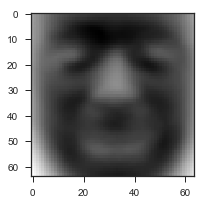

Eigenface  1


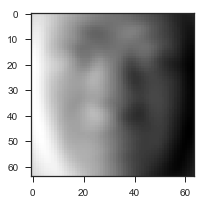

Eigenface  2


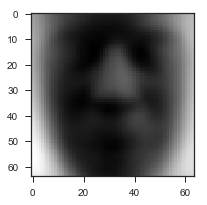

In [64]:
ef_subsp = eigenfaces.components

for i in range(3):#len(ef_subsp[0])):
    print("Eigenface ", i)
    im2 = ef_subsp[:,(i)].reshape(64,64)
    show_img(im2)

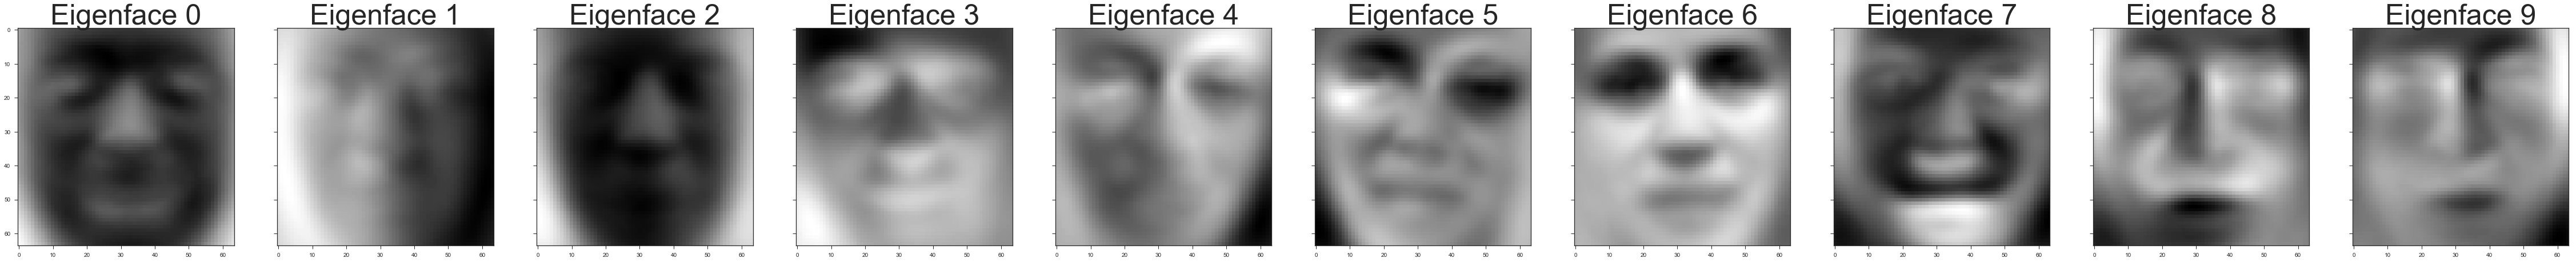

In [65]:
fig, axes = plt.subplots(ncols=len(ef_subsp[0]), sharey=True ,figsize=(len(ef_subsp[0])*8, 7))
for i in range(len(ef_subsp[0])):
    #print("Eigenface ", i)
    im2 = ef_subsp[:,(i)].reshape(64,64)
    axes[i].imshow(im2,cmap='gray',)
    axes[i].set_title("Eigenface " + str(i) ,fontsize= 50)
#plt.subplots(squeeze=False, figsize=(5*(nplots-1), 6*(nplots-2)))

In [76]:
def covariance_matrix(X):
    num_samples, _ = X.shape
    mu = np.mean(X, axis=0)
    X_normalized = X - mu
    return X_normalized.T.dot(X_normalized) / num_samples